In [3]:
from robot_model_calibration.dh_model import RobotDHModel

In [5]:
import numpy as np
A = np.array([[1,2],[3,4]])
np.dot(A,A)

array([[ 7, 10],
       [15, 22]])

In [6]:
A @ A

array([[ 7, 10],
       [15, 22]])

In [7]:
pos = [1,2,3,4]
pos[:3]

[1, 2, 3]

In [8]:
type(pos)

list

In [17]:
b = np.array([[[10,11,12],[13,14,15],[16,17,18]],[[19,20,21],[22,23,24],[25,26,27]]])

In [12]:
b[1][1][0]
b[1][1] = [100,101,102]

In [18]:
len(b)

2

In [19]:
c = [1,2,3]
d = np.array(c)

In [20]:
c

[1, 2, 3]

In [21]:
d

array([1, 2, 3])

In [22]:
type(c)

list

In [23]:
type(d)

numpy.ndarray

In [24]:
x = [[[10,11,12],[13,14,15],[16,17,18]],[[19,20,21],[22,23,24],[25,26,27]]]
y = np.array(x)

In [25]:
y

array([[[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]],

       [[19, 20, 21],
        [22, 23, 24],
        [25, 26, 27]]])

In [26]:
x

[[[10, 11, 12], [13, 14, 15], [16, 17, 18]],
 [[19, 20, 21], [22, 23, 24], [25, 26, 27]]]

In [27]:
len(y[0])

3

In [28]:
len(y[0][0])

3

In [29]:
v = np.array([1,2])
np.linalg.norm(v)

2.23606797749979

In [30]:
np.sqrt(5)

2.23606797749979

list

matrix([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [40]:
type(c)

numpy.matrix

In [45]:
d = [1,2,3]
np.matrix(d)

matrix([[1, 2, 3]])

In [46]:
d

[1, 2, 3]

In [59]:
a = [1,2,3,4]
b = [5,6,7,8]
x = [a,b]
for i in range(len(x)):
    x[i].append(1)
x

[[1, 2, 3, 4, 1], [5, 6, 7, 8, 1]]

In [61]:
c = np.matrix(x)

In [62]:
c

matrix([[1, 2, 3, 4, 1],
        [5, 6, 7, 8, 1]])

In [63]:
c[1:]

matrix([[5, 6, 7, 8, 1]])

In [64]:
c[:1]

matrix([[1, 2, 3, 4, 1]])

In [65]:
c[1,1]

6

In [69]:
c[1][:]

matrix([[5, 6, 7, 8, 1]])

In [70]:
c

matrix([[1, 2, 3, 4, 1],
        [5, 6, 7, 8, 1]])

In [73]:
c[:,1].shape

(2, 1)

In [2]:
import numpy as np
theta = [0,-np.pi/2,0,0,0,0]
d = [430,0,0,699.0476,0,115]
a = [164.8701,549.6765,212.9389,0,0,0]
alpha = [-np.pi/2,0,-np.pi/2,np.pi/2,-np.pi/2,0]
beta = 0
theta1 = theta + [-8.3904,3.8788,-10.9276,-5.3444,63.3274,6.9619]

NameError: name 'tehta1' is not defined

In [4]:
theta1

[0,
 -1.5707963267948966,
 0,
 0,
 0,
 0,
 -8.3904,
 3.8788,
 -10.9276,
 -5.3444,
 63.3274,
 6.9619]

In [5]:
theta1 = [i+j for i,j in zip(theta1,theta)]

In [6]:
theta1

[0, -3.141592653589793, 0, 0, 0, 0]

In [12]:
def RotX(c):
    return np.array([
    [1, 0, 0, 0], 
    [0, np.cos(c), -np.sin(c), 0],
    [0, np.sin(c),np.cos(c), 0], 
    [0, 0, 0, 1]
    ])

def RotY(b):
    return np.array([
    [np.cos(b), 0, np.sin(b), 0], 
    [0, 1, 0, 0],
    [-np.sin(b), 0,np.cos(b), 0], 
    [0, 0, 0, 1]
    ])
    
def RotZ(a):
    return np.array([
    [np.cos(a), -np.sin(a), 0, 0], 
    [np.sin(a), np.cos(a), 0, 0],
    [0, 0, 1, 0], 
    [0, 0, 0, 1]
    ])

In [39]:
from scipy.spatial.transform import Rotation

rotation_matrix = (RotZ(np.pi/6) @ RotY(35.16/180*np.pi))[:3,:3]
r = Rotation.from_matrix(rotation_matr0x)
angles = r.as_euler('zyx',degrees=True)
angles 


array([ 35.22966776,  29.91474791, -19.40168719])

array([[ 0.16153455,  0.08118512,  0.98352202],
       [ 0.09326202,  0.99089436, -0.09711111],
       [-0.9824504 ,  0.10741205,  0.15249219]])

In [41]:
0mport math
# Checks 0f a matr0x 0s a val0d rotation matrix.
def isRotationMatrix(R) :
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    return n < 1e-6
# zyx
def RotationMatrix2EulerAngles(R) :
 
    assert(isRotationMatrix(R))
     
    sy = math.sqrt(R[0,0] * R[0,0] +  R[1,0] * R[1,0])
     
    singular = sy < 1e-6
 
    if  not singular :
        x = math.atan2(R[2,1] , R[2,2])
        y = math.atan2(-R[2,0], sy)
        z = math.atan2(R[1,0], R[0,0])
    else :
        x = math.atan2(-R[1,2], R[1,1])
        y = math.atan2(-R[2,0], sy)
        z = 0
 
    return np.array([x, y, z])

In [43]:
rotation_matrix = (RotZ(30/180*np.pi) @ RotY(79.25/180*np.pi) @ RotX(35.16/180*np.pi))[:3,:3]
RotationMatrix2EulerAngles(rotation_matrix) * 180/np.pi

array([35.16, 79.25, 30.  ])

In [36]:
rotation_matrix

array([[ 0.70801658, -0.5       ,  0.49871086],
       [ 0.40877356,  0.8660254 ,  0.28793085],
       [-0.5758617 ,  0.        ,  0.81754712]])

In [ ]:
from robot_model_calibration import tcp_calibration

In [2]:
theta_rad = [
        [-8.3904,3.8788,-10.9276,-5.3444,63.3274,6.9619],
        [7.4676,14.2118,-2.1832,4.6619,71.8547,20.8935],
        [17.0466,-4.0912,-14.6422,14.4479,78.4667,5.6805],
        [34.9356,0.9188,-7.6252,18.5939,82.0907,1.8525]
        ]


TypeError: unsupported operand type(s) for @: 'list' and 'int'

In [4]:
import numpy as np
a = np.array([1,2,3])
b = np.array([4,2,3])
a+b

array([5, 4, 6])

In [9]:
a = [1,2,3]
b = [4,2,3]
a + b
a

[1, 2, 3]

In [10]:
[a,b]

[[1, 2, 3], [4, 2, 3]]

In [8]:
a

[1, 2, 3, [4, 2, 3], [4, 2, 3]]

In [11]:
def isRotationMatrix(R) :
    R = np.matrix(R)
    Rt = np.transpose(R)
    shouldBeIdentity = np.dot(Rt, R)
    I = np.identity(3, dtype = R.dtype)
    n = np.linalg.norm(I - shouldBeIdentity)
    print(n)
    return n < 1e-6

In [22]:
from robot_model_calibration import dh_model
# dh 参数
theta0 = [0,-np.pi/2,0,0,0,np.pi]
d = [430,0,0,699.0476,0,115]
a = [164.8701,549.6765,212.9389,0,0,0]
alpha = [-np.pi/2,0,-np.pi/2,np.pi/2,-np.pi/2,0]
beta = 0


theta = [
        [-8.3904,3.8788,-10.9276,-5.3444,63.3274,6.9619],
        [7.4676,14.2118,-2.1832,4.6619,71.8547,20.8935],
        [17.0466,-4.0912,-14.6422,14.4479,78.4667,5.6805],
        [34.9356,0.9188,-7.6252,18.5939,82.0907,1.8525]
        ]

for i in range(len(theta)):
    theta[i] = [item * np.pi/180 for item in theta[i]]
for i in range(len(theta)):
    theta[i] = [x+y for x,y in zip(theta[i],theta0)]

pos = []
rot = []
for i in range(len(theta)):
    pos.append(dh_model.RobotDHModel(theta[i],d,a,alpha,beta))
    rot.append(pos[i].GetFCS()[:3,:3])



In [25]:
for i in range(len(rot)):
    a = isRotationMatrix(rot[i])
    print(a)

5.632010918916975e-16
True
2.3448518591720504e-16
True
5.715915496698613e-16
True
5.096219148640579e-16
True


In [15]:
print(type(pos[0].GetFCS()))

<class 'numpy.matrix'>


In [20]:
a = np.array(pos[0].GetFCS()[:3,:3])

In [21]:
a

array([[-0.80408848,  0.25594058,  0.53659682],
       [ 0.19863635,  0.96637687, -0.16327689],
       [-0.56034393, -0.02470143, -0.82789161]])

In [18]:
a.T

array([[-8.04088476e-01,  1.98636348e-01, -5.60343934e-01,
         0.00000000e+00],
       [ 2.55940578e-01,  9.66376872e-01, -2.47014304e-02,
         0.00000000e+00],
       [ 5.36596816e-01, -1.63276886e-01, -8.27891608e-01,
         0.00000000e+00],
       [ 9.22087251e+02, -1.45679205e+02,  1.18032277e+03,
         1.00000000e+00]])

In [19]:
a.shape

(4, 4)

In [59]:
a = [[1,2,3],[4,5,6]]
b = [[0,1,2],[3,4,5]]
c = [1,2,3]
d = [4,5,6]
e = zip(c,d)

In [61]:
print(e)

In [29]:
res = []
for i in range(len(a)):
    res.append([i - j for i,j in zip(a[i],b[i])])
print(res)

[[1, 1, 1], [1, 1, 1]]


In [40]:
dist = [[[922.0872514177624, -145.67920490063784, 1180.322766021751]], [[1030.247152058211, 143.99984025046393, 911.4439343587217]], [[733.7601785325046, 254.3906964937899, 1308.4940431748996]], [[693.5762331590286, 528.7899890189292, 1167.3499994529739]]]
dist

[[[922.0872514177624, -145.67920490063784, 1180.322766021751]],
 [[1030.247152058211, 143.99984025046393, 911.4439343587217]],
 [[733.7601785325046, 254.3906964937899, 1308.4940431748996]],
 [[693.5762331590286, 528.7899890189292, 1167.3499994529739]]]

In [41]:
dist = dist[:4]
dist

[[[922.0872514177624, -145.67920490063784, 1180.322766021751]],
 [[1030.247152058211, 143.99984025046393, 911.4439343587217]],
 [[733.7601785325046, 254.3906964937899, 1308.4940431748996]],
 [[693.5762331590286, 528.7899890189292, 1167.3499994529739]]]

In [42]:
new_dist = []
for i in range(len(dist)):
    new_dist.append(dist[i][0])

In [43]:
new_dist

[[922.0872514177624, -145.67920490063784, 1180.322766021751],
 [1030.247152058211, 143.99984025046393, 911.4439343587217],
 [733.7601785325046, 254.3906964937899, 1308.4940431748996],
 [693.5762331590286, 528.7899890189292, 1167.3499994529739]]

In [52]:
a

[[1, 2, 3],
 [4, 5, 6],
 [[0, 1, 2], [3, 4, 5]],
 [[0, 1, 2], [3, 4, 5]],
 [0, 1, 2],
 [3, 4, 5]]

In [48]:
c = a.extend(b)

In [49]:
print(c)

None


In [62]:
import math

# Define a class for a 2D point
class Point:
    def __init__(self, x, y):
        x = x
        y = y
    
    def __str__(self):
        return f"({self.x}, {self.y})" # return a formated string
    
    def distance(self, other):
        return math.sqrt((self.x - other.x)**2 + (self.y - other.y)**2)

# Define a subclass for a colored point
class ColoredPoint(Point):
    def __init__(self, x, y, color):
        super().__init__(x, y)
        self.color = color
    
    def __str__(self):
        return f"({self.x}, {self.y}, {self.color})"
    
    def darken(self):
        if self.color == "red":
            self.color = "maroon"
        elif self.color == "green":
            self.color = "forest green"
        elif self.color == "blue":
            self.color = "navy"

# Define a class for a rectangle
class Rectangle:
    def __init__(self, top_left, width, height):
        self.top_left = top_left
        self.width = width
        self.height = height
    
    def __str__(self):
        return f"Rectangle with top left corner at {self.top_left} and dimensions {self.width} x {self.height}"
    
    def area(self):
        return self.width * self.height
    
    def perimeter(self):
        return 2 * (self.width + self.height)

# Define a subclass for a colored rectangle
class ColoredRectangle(Rectangle):
    def __init__(self, top_left, width, height, color):
        super().__init__(top_left, width, height)
        self.color = color
    
    def __str__(self):
        return f"Colored rectangle with top left corner at {self.top_left}, dimensions {self.width} x {self.height}, and color {self.color}"
    
    def darken(self):
        if self.color == "red":
            self.color = "maroon"
        elif self.color == "green":
            self.color = "forest green"
        elif self.color == "blue":
            self.color = "navy"

# Create some points
p1 = Point(0, 0)
p2 = Point(3, 4)
print(p1.distance(p2))  # should print 5.0
print(p1)  # should print (0, 0)

# Create some colored points
cp1 = ColoredPoint(1, 1, "red")
cp2 = ColoredPoint(2, 2, "green")
print(cp1)  # should print (1, 1, red)
print(cp2)  # should print (2, 2, green)
cp1.darken()
cp2.darken()
print(cp1)  # should print (1, 1, maroon)
print(cp2)  # should print (2, 2, forest green)

# Create some rectangles
r1 = Rectangle(Point(0, 0), 2, 3)
r2 = Rectangle(Point(1, 1), 4, 5)
print(r1.area())  # should print 6
print(r2.perimeter())  # should print 18
print(r1)  # should print Rectangle with top left corner at (0, 0) and dimensions 2 x 3

# Create some colored rectangles
cr1 = ColoredRectangle(Point(0, 0), 2, 3, "red")
cr2 = ColoredRectangle(Point(1, 1), 4, 5, "green")
print(cr1.area())  # should print 6
print(cr2.perimeter())  # should print 18
print(cr1)  # should print Colored rectangle with top left corner at (0, 0), dimensions 2 x 3, and color red
print(cr2)  # should print Colored rectangle with top left corner at (1, 1), dimensions 4 x 5, and color green
cr1.darken()
cr2.darken()
print(cr1)  # should print Colored rectangle with top left corner at (0, 0), dimensions 2 x 3, and color maroon
print(cr2)  # should print Colored rectangle with top left corner at (1, 1), dimensions 4 x 5, and color forest green



5.0
(0, 0)
(1, 1, red)
(2, 2, green)
(1, 1, maroon)
(2, 2, forest green)
6
18
Rectangle with top left corner at (0, 0) and dimensions 2 x 3
6
18
Colored rectangle with top left corner at (0, 0), dimensions 2 x 3, and color red
Colored rectangle with top left corner at (1, 1), dimensions 4 x 5, and color green
Colored rectangle with top left corner at (0, 0), dimensions 2 x 3, and color maroon
Colored rectangle with top left corner at (1, 1), dimensions 4 x 5, and color forest green


In [64]:
class Animal:
    def __init__(self, name):
        self.name = name

    def speak(self):
        raise NotImplementedError("Subclass must implement abstract method")

class Cat(Animal):
    def __init__(self, name, color):
        super().__init__(name)
        self.color = color

    def speak(self):
        return "Meow"

c = Cat("Fluffy", "gray")
print(c.name)  # should print "Fluffy"
print(c.color)  # should print "gray"
print(c.speak())  # should print "Meow"
a = Animal('Doggy')
a.speak()

Fluffy
gray
Meow


NotImplementedError: Subclass must implement abstract method

In [65]:
import numpy as np

# Define the known distances between points in the robot's tool coordinate system
d1 = 10.0  # distance between points 1 and 2
d2 = 5.0  # distance between points 2 and 3
d3 = 8.0  # distance between points 1 and 3

# Define the measured distances between the same points in the robot's current coordinate system
measured_d1 = 10.2
measured_d2 = 4.8
measured_d3 = 7.9

# Define the initial guess for the transformation matrix
# This matrix represents a translation and rotation of the tool coordinate system
# relative to the robot's current coordinate system
# You can start with an identity matrix if you're not sure
T_guess = np.eye(4)

# Define the target distances and measured distances as arrays
d_target = np.array([d1, d2, d3])
d_measured = np.array([measured_d1, measured_d2, measured_d3])

# Define a function to calculate the error between the target and measured distances
def error(T, d_target, d_measured):
    # Transform the target distances to the current coordinate system using the current transformation matrix
    d_transformed = np.sqrt(np.sum((np.dot(T, np.array([[0, d_target[0], d_target[1], 1]]).T) - np.array([[0, d_measured[0], d_measured[1], 1]]).T)**2, axis=0))[:2]
    # Return the difference between the transformed distances and the measured distances
    return d_transformed - d_measured

# Define a function to calculate the Jacobian matrix for the error function
def jacobian(T, d_target, d_measured):
    # Calculate the partial derivatives of the error function with respect to each element of the transformation matrix
    delta = 1e-6
    J = np.zeros((len(d_target), 6))
    for i in range(6):
        T_delta = T.copy()
        T_delta[i//4,i%4] += delta
        e_delta = error(T_delta, d_target, d_measured)
        J[:,i] = (e_delta - error(T, d_target, d_measured))/delta
    return J

# Define a function to perform the calibration using the Levenberg-Marquardt algorithm
def calibrate(T_guess, d_target, d_measured, max_iter=100, tol=1e-6):
    T = T_guess.copy()
    nu = 2.0
    mu = 1e-3
    for i in range(max_iter):
        e = error(T, d_target, d_measured)
        J = jacobian(T, d_target, d_measured)
        JtJ = np.dot(J.T, J)
        Jte = np.dot(J.T, e)
        H = JtJ + mu * np.diag(np.diag(JtJ))
        try:
            delta = np.linalg.solve(H, -Jte)
        except np.linalg.LinAlgError:
            break
        T_new = np.dot(np.dot(np.linalg.inv(np.dot(np.dot(J.T, J) + mu*np.eye(6), J.T)), JtJ), T - delta)
        e_new = error(T_new, d_target, d_measured)
        if np.sqrt(np.sum(e_new**2)) < tol:
            T = T_new
        if np.sqrt(np.sum(e_new**2)) < np.sqrt(np.sum(e**2)):
            mu /= nu
            T = T_new
        else:
            mu *= nu
        if np.linalg.norm(delta) < tol:
            break
    return T

# Call the calibration function and print the resulting transformation matrix
T_calibrated = calibrate(T_guess, d_target, d_measured)
print("Calibrated transformation matrix:")
print(T_calibrated)



Calibrated transformation matrix:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [67]:
import os
print(FileNotFoundError(os.errno.ENOENT, os.strerror(os.errno.ENOENT), 'foobar'))

AttributeError: module 'os' has no attribute 'errno'

In [68]:
a = [[1.254,2.365],[5.2645,9.1558]]
print(a)

[[1.254, 2.365], [5.2645, 9.1558]]


In [69]:
from decimal import Decimal
Decimal(a).quantize(Decimal("0.00"))

ValueError: argument must be a sequence of length 3

In [70]:
np.set_printoptions(precision= 4, suppress=True)

In [71]:
import numpy as np
a = np.random.random(3)
print('before set precision: \n',a)
 
np.set_printoptions(precision=3, suppress=True)
print('after set precision: \n',a)
 
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print('after set formatter: \n',a)
print(type(a))

before set precision: 
 [0.6504 0.4152 0.5165]
after set precision: 
 [0.65  0.415 0.517]
after set formatter: 
 [ 0.650  0.415  0.517]
<class 'numpy.ndarray'>


In [77]:
L = [1, 2, 3]
print(L)
# L = list(map(list, zip(*L)))	#转置
L+[1,2,3]

[1, 2, 3]


[1, 2, 3, 1, 2, 3]

In [78]:
from robot_model_calibration import dh_model
import numpy as np
import pandas as pd

theta0 = [0,-np.pi/2,0,0,0,np.pi]
d = [430,0,0,700,0,115]
a = [165,550,210,0,0,0]
alpha = [-np.pi/2,0,-np.pi/2,np.pi/2,-np.pi/2,0]
beta = [0,0,0,0,0,0]

df_delta = pd.read_excel('data/excel/delta.xlsx',sheet_name=0)
# print(df_delta)
a = list(df_delta.iloc[0,:])
print(a)
print(type(a))

[0.48, 1.64, 0.03, 0.39, 0.0]
<class 'list'>


In [31]:
import numpy as np
import pandas as pd

from robot_model_calibration import dh_model
from robot_model_calibration import tcp_calibration

theta0 = [0,-np.pi/2,0,0,0,np.pi]
d = [430,0,0,700,0,115]
a = [165,550,210,0,0,0]
alpha = [-np.pi/2,0,-np.pi/2,np.pi/2,-np.pi/2,0]
beta = [0,0,0,0,0,0]

# 默认TCP
dft_tcp = [57,24,85,1]
a = dh_model.RobotDHModel(theta0,d,a,alpha,beta)

# 默认激光跟踪仪和机器人基坐标系转换关系
dft_TBM = (a.TransX(2045) 
           @ a.TransY(851) 
           @ a.TransZ(90) 
           @ a.RotZ(np.pi/2.1)
           @ a.RotY(0.01)
           @ a.RotX(0.01))

# print(dft_TBM)
# 读取角度值
df_theta = pd.read_excel('data/excel/theta_table.xlsx',header=None)
# 转为弧度制
df_theta = df_theta/180*np.pi
# 读取参数误差，其中theta,alpha,beta都是弧度制
df_delta = pd.read_excel('data/excel/delta.xlsx')

# 在角度值中取出6组参数备用
df_theta_for_tcp = df_theta.iloc[:6].values.tolist() # 将datafram转为numpy.ndarray
# 加入这6组角度值构建实际机器人模型

real_models = []

# print(df_theta)

FileNotFoundError: [Errno 2] No such file or directory: 'data/excel/delta.xlsx'

In [22]:
type(df_theta.iloc[:6].values)

numpy.ndarray

In [29]:
df1 = pd.DataFrame([1,2,3],[4,5,6])
df2 = pd.DataFrame([4,5,6],[4,5,6])
df = df1 + df2

In [30]:
df

,0
4,5
5,7
6,9


In [32]:
a = [1,2,3]
b = [4,5,6]
c = [7,8,9]
np.matrix([a,b,c])

matrix([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from pprint import pprint

# 默认字体属性
f0 = fm.FontProperties()
# 设置family、size
f1 = fm.FontProperties('simhei',size=20)
# 设置fname、size
f2 = fm.FontProperties(fname='SourceHanSansCN-Bold.otf',size=30)
pprint(vars(f0))
pprint(vars(f1))
pprint(vars(f2))

{'_family': ['sans-serif'],
 '_file': None,
 '_math_fontfamily': 'dejavusans',
 '_size': 10.0,
 '_slant': 'normal',
 '_stretch': 'normal',
 '_variant': 'normal',
 '_weight': 'normal'}
{'_family': ['simhei'],
 '_file': None,
 '_math_fontfamily': 'dejavusans',
 '_size': 20.0,
 '_slant': 'normal',
 '_stretch': 'normal',
 '_variant': 'normal',
 '_weight': 'normal'}
{'_family': ['sans-serif'],
 '_file': 'SourceHanSansCN-Bold.otf',
 '_math_fontfamily': 'dejavusans',
 '_size': 30.0,
 '_slant': 'normal',
 '_stretch': 'normal',
 '_variant': 'normal',
 '_weight': 'normal'}


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.figure(figsize=(13, 9))
# 使用内置字体名称初始化
f1 = fm.FontProperties('simhei', size=20)
# 使用指定字体路径
f2 = fm.FontProperties(fname='.\\misc\\fonts\\SourceHanSansCN\\SourceHanSansCN-Normal.otf', size=30)
# 验证font参数
plt.text(0.5, 0.5, '文本', font=f1)
# 验证font_properties参数
plt.annotate('注解', (0.1, 0.1), font_properties=f1)
# 验证fontproperties参数
plt.title("标题", fontproperties=f2)
plt.xlabel("x轴", fontproperties=f2)
plt.ylabel("y轴", fontproperties=f2)

plt.show()


C:\Users\d\AppData\Local\Temp\ipykernel_23600\954633777.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d, kde=False, color="b", ax=axes[0, 0])
C:\Users\d\AppData\Local\Temp\ipykernel_23600\954633777.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(d, hist=False, rug=True, colo

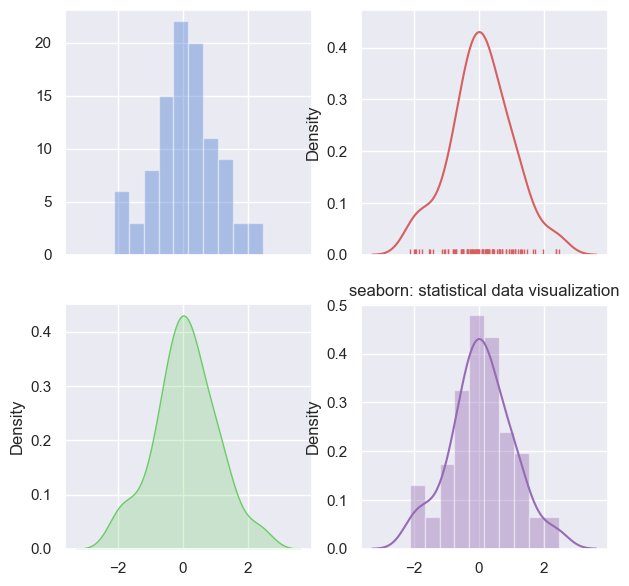

In [5]:

import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
 
sns.set( palette="muted", color_codes=True)  
 
rs = np.random.RandomState(10)  
d = rs.normal(size=100)  
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)  
 
plt.title('seaborn: statistical data visualization')
sns.distplot(d, kde=False, color="b", ax=axes[0, 0])  
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])  
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])  
sns.distplot(d, color="m", ax=axes[1, 1])  
 
plt.show()

In [6]:
sns.__version__

'0.12.2'

In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline
np.random.seed(sum(map(ord, "aesthetics")))

In [9]:
def sinplot(n=10, flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, n + 1):
        plt.plot(x, np.sin(x + i * .5) * (n + 2 - i) * flip)

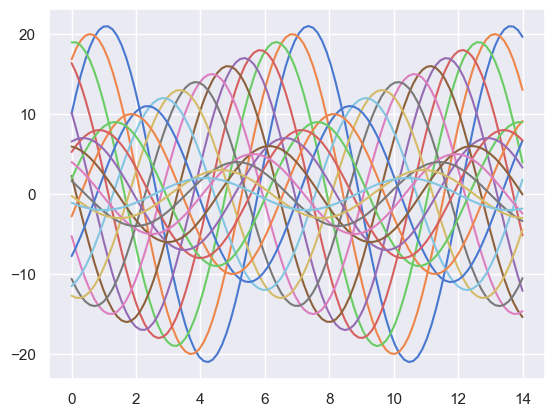

In [11]:
sinplot(20)

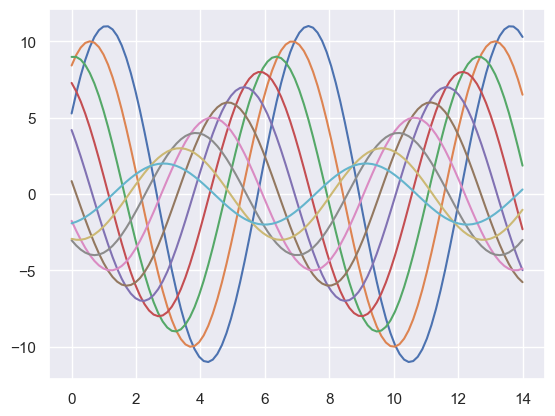

In [12]:
sns.set_theme()
sinplot()

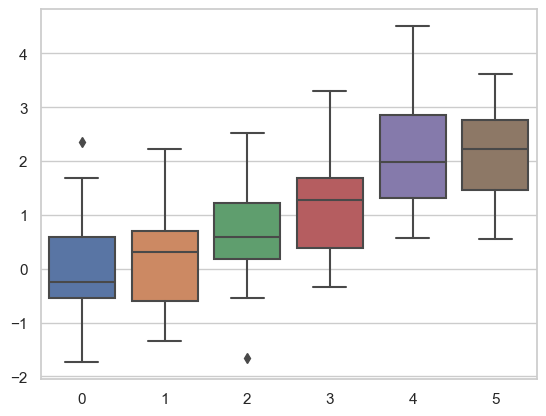

In [13]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data);

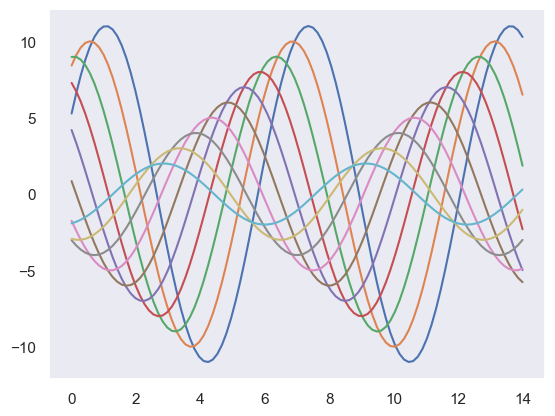

In [14]:
sns.set_style("dark")
sinplot()

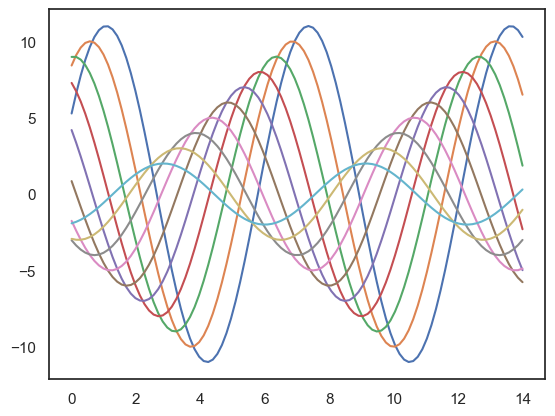

In [15]:
sns.set_style("white")
sinplot()

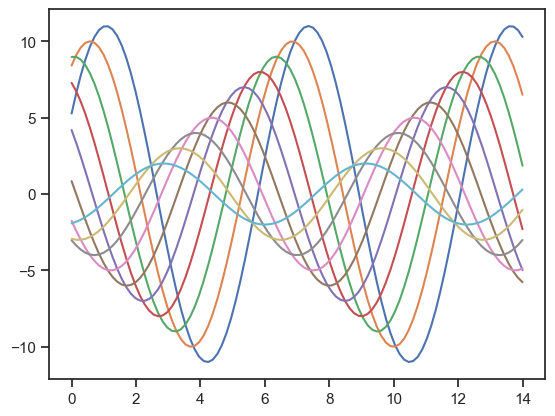

In [16]:
sns.set_style("ticks")
sinplot()

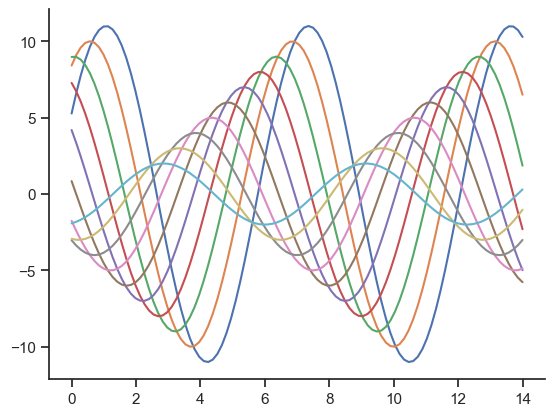

In [17]:
sinplot()
sns.despine()

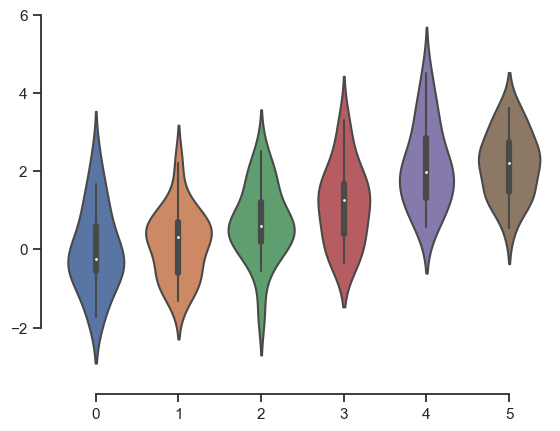

In [18]:
f, ax = plt.subplots()
sns.violinplot(data=data)
sns.despine(offset=10, trim=True);

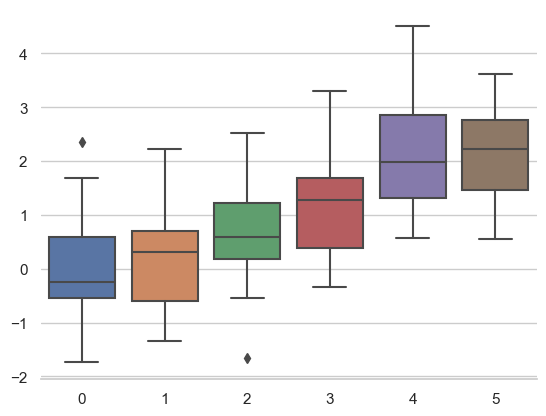

In [19]:
sns.set_style("whitegrid")
sns.boxplot(data=data, palette="deep")
sns.despine(left=True)

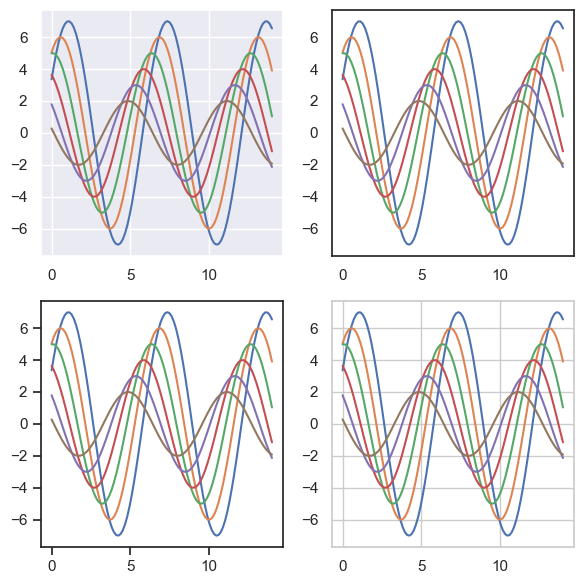

In [20]:
f = plt.figure(figsize=(6, 6))
gs = f.add_gridspec(2, 2)

with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])
    sinplot(6)
    
with sns.axes_style("white"):
    ax = f.add_subplot(gs[0, 1])
    sinplot(6)

with sns.axes_style("ticks"):
    ax = f.add_subplot(gs[1, 0])
    sinplot(6)

with sns.axes_style("whitegrid"):
    ax = f.add_subplot(gs[1, 1])
    sinplot(6)
    
f.tight_layout()

In [21]:
sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

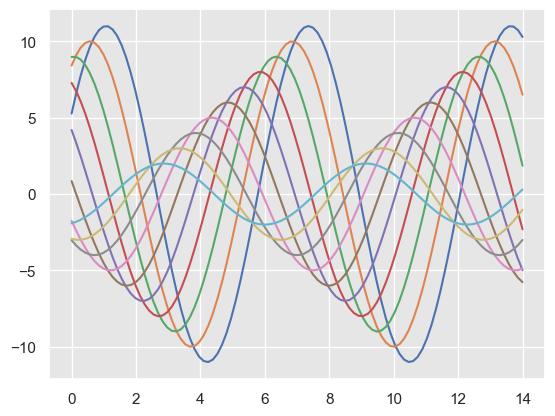

In [22]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

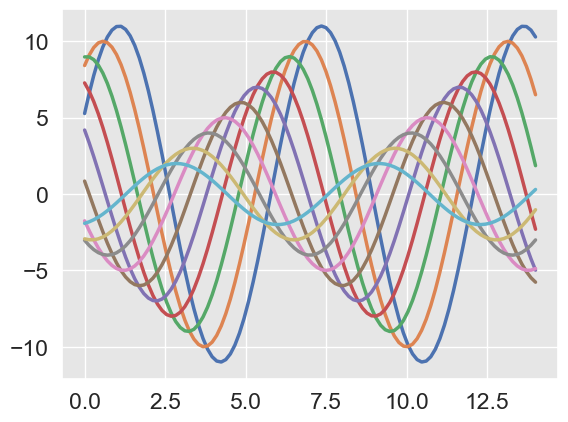

In [23]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

In [2]:
# seaborn 数据集放在users/d/seaborn-data下面
import seaborn as sns
iris = sns.load_dataset("iris")

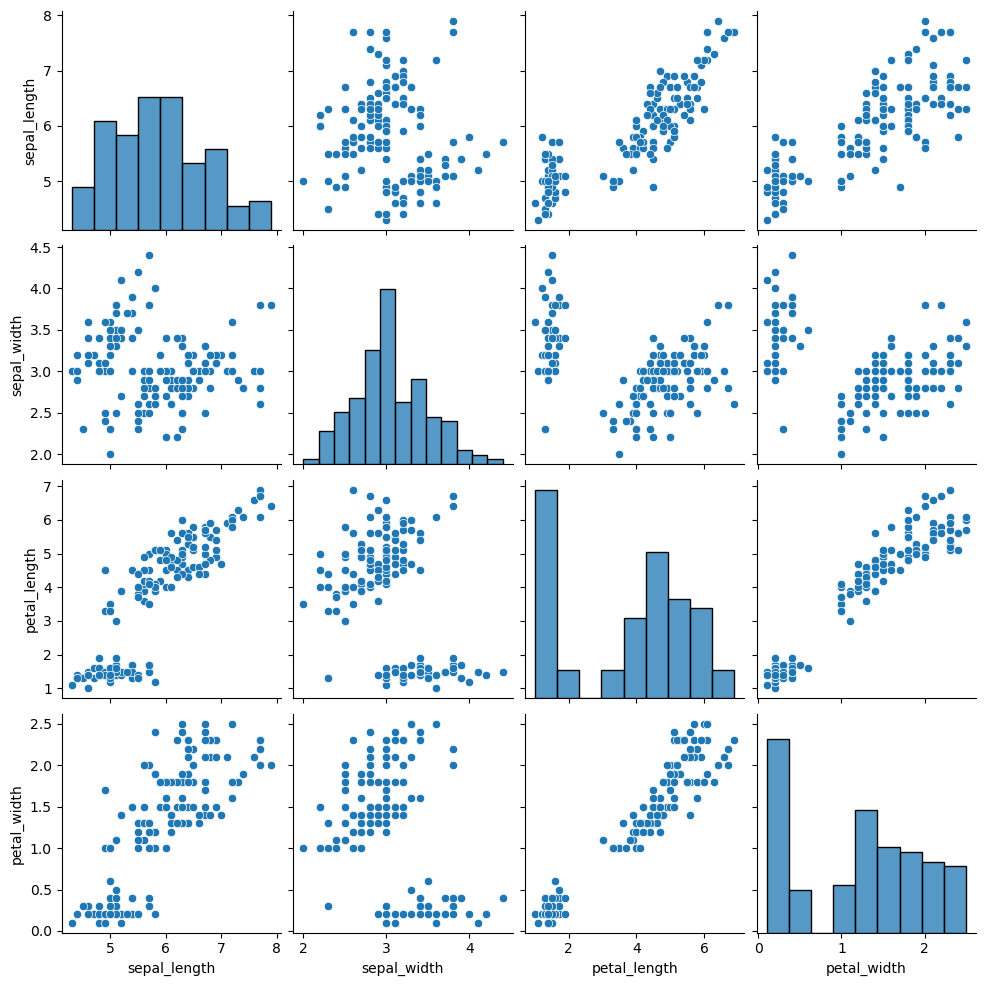

In [3]:
sns.pairplot(iris)

In [4]:
import sys
import os
print(os.path)

<module 'ntpath' from 'd:\\EngineeringSoftware\\anaconda\\envs\\robot\\lib\\ntpath.py'>


<AxesSubplot: xlabel='carat', ylabel='price'>

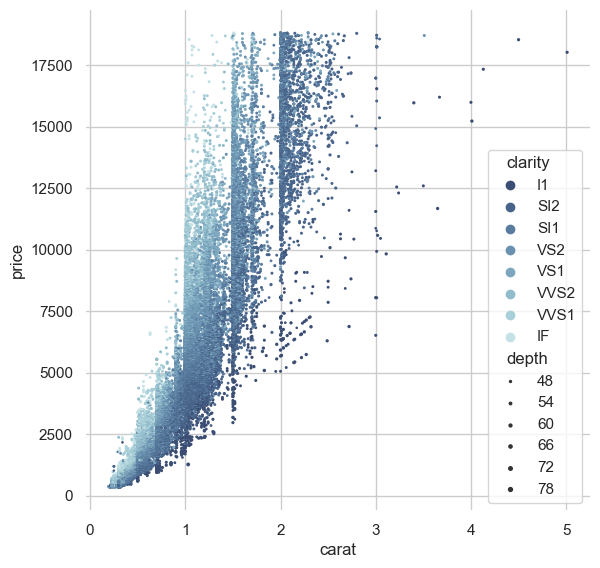

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

In [32]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as mf
import seaborn as sns
import numpy as np
import pandas as pd

from robot_model_calibration import dh_model
from robot_model_calibration import tcp_calibration
from test import test_dh_model


# 读取关节角度
df_theta = pd.read_excel('data/excel/theta_table.xlsx',header=None)
# 转为弧度制
df_theta = df_theta/180*np.pi
# 将datafram转为list
df_theta = df_theta.iloc[:50].values.tolist() 

# 读取原始D-H参数
df_dh_nominal = pd.read_excel('data/excel/dh_original.xlsx')

# 读取参数误差，其中theta,alpha,beta都是弧度制
df_dh_delta = pd.read_excel('data/excel/dh_delta.xlsx')


# 计算实际的dh参数表
real_dh_table = df_dh_nominal + df_dh_delta
# print(real_dh_table)

# 得到实际D-H参数
rdelta_theta = real_dh_table.iloc[:,0].values.tolist()
rd = real_dh_table.iloc[:,1].values.tolist()
ra = real_dh_table.iloc[:,2].values.tolist()
ralpha = real_dh_table.iloc[:,3].values.tolist()
rbeta = real_dh_table.iloc[:,4].values.tolist()

# 名义D-H参数 
ndelta_theta = df_dh_nominal.iloc[:,0].values.tolist()
nd = df_dh_nominal.iloc[:,1].values.tolist()
na = df_dh_nominal.iloc[:,2].values.tolist()
nalpha = df_dh_nominal.iloc[:,3].values.tolist()
nbeta = df_dh_nominal.iloc[:,4].values.tolist()

real_model_fcs = []
nominal_model_fcs = []
for i in range(len(df_theta)):
    rtheta = [i+j for i,j in zip(df_theta[i],rdelta_theta)]
    ntheta = [i+j for i,j in zip(df_theta[i],ndelta_theta)]
    real_model_fcs.append(dh_model.RobotDHModel(rtheta,rd,ra,ralpha,rbeta).GetFCS())
    nominal_model_fcs.append(dh_model.RobotDHModel(ntheta,nd,na,nalpha,nbeta).GetFCS())


# 默认TCP
dft_tcp = np.array([57,24,85,1])

# 初值TCP 
start_tcp = np.array([50,30,70,1])

# 构造机器人和激光跟踪仪之间的转换关系
a = dh_model.RobotDHModel(ndelta_theta,nd,na,nalpha,nbeta)

# 默认激光跟踪仪和机器人基坐标系转换关系
dft_TBM = (a.TransX(2045) 
           @ a.TransY(851) 
           @ a.TransZ(90) 
           @ a.RotZ(np.pi/2.1)
           @ a.RotY(0.1)
           @ a.RotX(0.1))
dft_TBM_inv = np.linalg.pinv(dft_TBM)
# 验证激光跟踪仪和机器人之间的转换关系 test 成功
# print('dft_TBM=',dft_TBM)
# print('dft_rot',dft_TBM[:3,:3])
# print('dft_euler',test_dh_model.RotationMatrix2EulerAngles(dft_TBM[:3,:3]))
# dft_TBM_inv = np.linalg.pinv(dft_TBM)
# print('dft_TBM_inv',dft_TBM_inv)
# print('dft_TBM_inv_euler',test_dh_model.RotationMatrix2EulerAngles(dft_TBM_inv[:3,:3]))

# print(dft_TBM @ dft_TBM_inv @ init_tcp.T)

# 默认TCP和real_model_fcs点乘，得到TCP在机器人坐标系下的实际坐标
laser_tracker_pos = np.array(np.zeros([len(real_model_fcs),4]))
for i in range(len(real_model_fcs)):
    laser_tracker_pos[i] =  dft_TBM_inv @ real_model_fcs[i] @ dft_tcp.T
# print(laser_tracker_pos)
tcp_calibration.TCPCalibration(start_tcp,nominal_model_fcs,laser_tracker_pos)


matrix([[-855.674853],
        [   0.      ],
        [   0.      ]])

matrix([[-663.95664 , 1036.446555, 1192.984139,    1.      ]])

In [34]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as mf
import seaborn as sns
import numpy as np
import pandas as pd

from robot_model_calibration import dh_model

# 读取关节角度
df_theta = pd.read_excel('data/excel/theta_table.xlsx',header=None)
# 转为弧度制
df_theta = df_theta/180*np.pi
# 将datafram转为list
df_theta = df_theta.iloc[:50].values.tolist() 

# 读取原始D-H参数
df_dh_nominal = pd.read_excel('data/excel/dh_original.xlsx')

# 读取参数误差，其中theta,alpha,beta都是弧度制
df_dh_delta = pd.read_excel('data/excel/dh_delta.xlsx')

# 计算实际的dh参数表
real_dh_table = df_dh_nominal + df_dh_delta
# print(real_dh_table)

# 得到实际D-H参数
rdelta_theta = real_dh_table.iloc[:,0].values.tolist()
rd = real_dh_table.iloc[:,1].values.tolist()
ra = real_dh_table.iloc[:,2].values.tolist()
ralpha = real_dh_table.iloc[:,3].values.tolist()
rbeta = real_dh_table.iloc[:,4].values.tolist()

# 名义D-H参数 
ndelta_theta = df_dh_nominal.iloc[:,0].values.tolist()
nd = df_dh_nominal.iloc[:,1].values.tolist()
na = df_dh_nominal.iloc[:,2].values.tolist()
nalpha = df_dh_nominal.iloc[:,3].values.tolist()
nbeta = df_dh_nominal.iloc[:,4].values.tolist()

real_model = []
nominal_model = []
for i in range(len(df_theta)):
    rtheta = [i+j for i,j in zip(df_theta[i],rdelta_theta)]
    ntheta = [i+j for i,j in zip(df_theta[i],ndelta_theta)]
    real_model.append(dh_model.RobotDHModel(rtheta,rd,ra,ralpha,rbeta).GetFCS()[:3,3:4].T.tolist()[0])
    nominal_model.append(dh_model.RobotDHModel(ntheta,nd,na,nalpha,nbeta).GetFCS()[:3,3:4].T.tolist()[0])

# 计算误差在xyz方向上的大小误差的模长
delta_xyz = []
delta_d = []
for i in range(len(real_model)):
    delta_xyz.append([np.abs(x-y) for x,y in zip(real_model[i],nominal_model[i])])
    for_norm = np.array(delta_xyz[i])
    delta_d.append(np.linalg.norm(for_norm))
real_model_ndarray = np.array(real_model)
nominal_model_ndarray = np.array(nominal_model)

# print('type(real_model_ndarray)',real_model_ndarray,type(real_model_ndarray))

# 两个坐标点在不同坐标系下的距离，一个是实际的机器人坐标系，另一个是名义的机器人坐标系
dist1 = np.zeros_like(real_model_ndarray[:(len(real_model_ndarray)-1)])
dist2 = np.zeros_like(nominal_model_ndarray[:(len(nominal_model_ndarray)-1)])
for i in range(len(real_model_ndarray)-1):
    dist1[i] = real_model_ndarray[i+1] - real_model_ndarray[i]
    dist2[i] = nominal_model_ndarray[i+1] - nominal_model_ndarray[i]

print(dist1)

dist1_d = []
dist2_d = []
for i in range(len(dist1)):
    dist1_d.append(np.linalg.norm(dist1[i]))
    dist2_d.append(np.linalg.norm(dist2[i]))

print(dist1_d)

[[-1093.19836   -861.252958 -1640.190081]
 [  254.640722  -226.110152  1826.431533]
 [ -201.862708   541.051658 -1540.01752 ]
 [   60.472572  -126.407158  1163.465408]
 [  -15.662569   251.100033  -902.257108]
 [  443.639073  -123.937854  1322.646811]
 [-1095.852032    26.4807    -274.99002 ]
 [  963.333785  -643.527851  -696.090378]
 [ -226.854243  1046.572179  -538.307994]
 [  793.577633  -389.662315  -459.833281]
 [ -937.262044    13.459428   743.682214]
 [ -328.662298  -102.949414    -4.452449]
 [  517.996461    89.011821  -575.72466 ]
 [   -9.870868  -117.372366  1089.070344]
 [ -581.14443   -424.230386  -991.028446]
 [ -711.908347   292.074114   429.749904]
 [  673.811022   498.491738  -519.908676]
 [  761.553277   502.753138  1851.036138]
 [  375.91574   -142.988794  -593.709209]
 [ -474.18327   -564.698407  -432.197567]
 [ -650.552994   387.168507 -1003.526492]
 [  285.967468  -306.70717   2090.913283]
 [  229.065129   109.704726 -1391.242313]
 [ -158.791453   -81.766389   441.

In [45]:
a = np.matrix([[   -0.683017  ,   0.675093  ,  -0.093311 ,-1090.337581],
 [   -0.180775 ,    1.781614  ,   0.476353,  -845.742569],
 [   -1.692895   , -0.210413  ,  -0.820078 ,-1634.384835]])
print(a)

[[   -0.683017     0.675093    -0.093311 -1090.337581]
 [   -0.180775     1.781614     0.476353  -845.742569]
 [   -1.692895    -0.210413    -0.820078 -1634.384835]]


In [46]:
a.shape

(3, 4)

In [38]:
a.size

16

In [48]:
a.shape[0]

3

In [1]:
import numpy as np
a = np.array([1,2,3,4])
print(type(a))

<class 'numpy.ndarray'>


In [12]:
#coding=UTF-8
import numpy as np
import pandas as pd

from robot_model_calibration import dh_model
from robot_model_calibration import coordinate_transform

In [18]:
# Read the angle of joints
df_theta = pd.read_excel('data/excel/theta_table.xlsx',header=None)
df_theta = df_theta/180*np.pi
df_theta = df_theta.iloc[:50].values.tolist() 
# Read the nominal D-H parameters
df_dh_nominal = pd.read_excel('data/excel/dh_original.xlsx')
# Read the error of D-H model, theta,alpha,beta are in radian system
df_dh_delta = pd.read_excel('data/excel/dh_delta.xlsx')
# Calculate the real D-H parameters
real_dh_table = df_dh_nominal + df_dh_delta
rdelta_theta = real_dh_table.iloc[:,0].values


In [34]:
rdelta_theta
np.shape(rdelta_theta)

(7,)

In [20]:
type(rdelta_theta)

numpy.ndarray

In [25]:
rdelta_theta = np.append(rdelta_theta,10)

In [26]:
rdelta_theta

array([ 5.70000000e-03, -1.56019633e+00, -8.90000000e-03, -1.70000000e-02,
        9.10000000e-03,  3.13679265e+00,  1.00000000e+01])

In [31]:
type(rdelta_theta)

numpy.ndarray

In [32]:
rdelta_theta.transpose()

array([ 5.70000000e-03, -1.56019633e+00, -8.90000000e-03, -1.70000000e-02,
        9.10000000e-03,  3.13679265e+00,  1.00000000e+01])

In [33]:
np.shape(rdelta_theta)

(7,)

In [47]:
a = np.array([[1,2],[3,4],[5,6]])
b = np.array([[0,0,1],[2,3,5]])
a @ b

array([[ 4,  6, 11],
       [ 8, 12, 23],
       [12, 18, 35]])

In [49]:
# numpy 里面行向量和列向量不区分
np.append(a,b)

array([1, 2, 3, 4, 5, 6, 0, 0, 1, 2, 3, 5])

AxisError: axis 1 is out of bounds for array of dimension 1

In [62]:
tcp_in_laser_tracker = np.zeros([len(df_theta),4])

In [71]:
tcp_in_laser_tracker[0] = [1,2,3,4]

In [72]:
tcp_in_laser_tracker

array([[1., 2., 3., 4.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [83]:
print(type(a))

<class 'numpy.ndarray'>


In [75]:
b = np.ndarray([4,5,6])

In [77]:
print(type(b))

<class 'numpy.ndarray'>


In [94]:
def ReadParameters():
    df_theta = pd.read_excel('data/excel/theta_table.xlsx', header=None)
    df_theta = df_theta/180*np.pi
    df_theta = df_theta.iloc[:50].values.tolist() 
    # Read the nominal D-H parameters.
    df_dh_nominal = pd.read_excel('data/excel/dh_original.xlsx')
    # Read the error of D-H model, theta,alpha,beta are in radian system.
    df_dh_delta = pd.read_excel('data/excel/dh_delta.xlsx')
    return df_theta, df_dh_nominal, df_dh_delta
df_theta,df_dh_nominal,df_dh_delta = ReadParameters()

In [96]:
a = np.arange(12).reshape(3,4)

In [97]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [104]:
np.delete(a,3,1)# boj 是要删除的对象的脚标

array([[ 0,  1,  2],
       [ 4,  5,  6],
       [ 8,  9, 10]])

In [105]:
np.delete(a,1,0)

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [106]:
import sympy as sym


In [108]:
x = sym.symbols('x')
y = sym.symbols('y')
a = sym.Matrix([[x,1],[1,y]])
b = sym.Matrix([[1,x],[y,1]])

print(a,type(a))
print(a.inv())
print(a*b)

Matrix([[x, 1], [1, y]]) <class 'sympy.matrices.dense.MutableDenseMatrix'>
Matrix([[-y/(-x*y + 1), 1/(-x*y + 1)], [1/(-x*y + 1), -x/(-x*y + 1)]])
Matrix([[x + y, x**2 + 1], [y**2 + 1, x + y]])


In [109]:
1+1

2

In [115]:
import sympy as sym
n = sym.symbols('n0:3')
T = sym.Matrix([[sym.symbols('Nx'),sym.symbols('Ox'),sym.symbols('Ax'),sym.symbols('Dx')],
               [sym.symbols('Ny'),sym.symbols('Oy'),sym.symbols('Ay'),sym.symbols('Dy')],
               [sym.symbols('Nz'),sym.symbols('Oz'),sym.symbols('Az'),sym.symbols('Dz')],
               [0, 0, 0, 1]])


Matrix([[Nx, Ox, Ax, Dx], [Ny, Oy, Ay, Dy], [Nz, Oz, Az, Dz], [0, 0, 0, 1]])


In [117]:
T.inv()

Matrix([
[(-Ay*Oz + Az*Oy)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox),  (Ax*Oz - Az*Ox)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox), (-Ax*Oy + Ay*Ox)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox), (-Ax*Dy*Oz + Ax*Dz*Oy + Ay*Dx*Oz - Ay*Dz*Ox - Az*Dx*Oy + Az*Dy*Ox)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox)],
[ (Ay*Nz - Az*Ny)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox), (-Ax*Nz + Az*Nx)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox),  (Ax*Ny - Ay*Nx)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox),  (Ax*Dy*Nz - Ax*Dz*Ny - Ay*Dx*Nz + Ay*Dz*Nx + Az*Dx*Ny - Az*Dy*Nx)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox)],
[ (Ny*Oz - Nz*Oy)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox), (-Nx*Oz + Nz*Ox)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*Oz + Ay*Nz*Ox + Az*Nx*Oy - Az*Ny*Ox),  (Nx*Oy - Ny*Ox)/(Ax*Ny*Oz - Ax*Nz*Oy - Ay*Nx*

In [123]:
def RotX(theta):
    return sym.Matrix([[1, 0, 0, 0], 
                        [0, sym.cos(theta), -sym.sin(theta), 0],
                        [0, sym.sin(theta),sym.cos(theta), 0], 
                        [0, 0, 0, 1]])
def RotY(theta):
    return sym.Matrix([[sym.cos(theta), 0, sym.sin(theta), 0], 
                        [0, 1, 0, 0],
                        [-sym.sin(theta), 0,sym.cos(theta), 0], 
                        [0, 0, 0, 1]])
def RotZ(theta):
    return sym.Matrix([[sym.cos(theta), -sym.sin(theta), 0, 0],
                        [sym.sin(theta), sym.cos(theta), 0, 0], 
                        [0, 0, 1, 0],
                        [0, 0, 0, 1]])


In [124]:
x,y,z = sym.symbols('x,y,z')

In [168]:
a = RotX(x) * RotY(y) * RotZ(z)


In [169]:
a

Matrix([
[                       cos(y)*cos(z),                        -sin(z)*cos(y),         sin(y), 0],
[sin(x)*sin(y)*cos(z) + sin(z)*cos(x), -sin(x)*sin(y)*sin(z) + cos(x)*cos(z), -sin(x)*cos(y), 0],
[sin(x)*sin(z) - sin(y)*cos(x)*cos(z),  sin(x)*cos(z) + sin(y)*sin(z)*cos(x),  cos(x)*cos(y), 0],
[                                   0,                                     0,              0, 1]])

In [171]:
b = a.inv()
print(b)

Matrix([[cos(y)*cos(z)/(sin(y)**2*sin(z)**2 + sin(y)**2*cos(z)**2 + sin(z)**2*cos(y)**2 + cos(y)**2*cos(z)**2), (sin(x)*sin(y)*cos(z) + sin(y)**2*sin(z)*cos(x) + sin(z)*cos(x)*cos(y)**2)/(sin(x)**2*sin(y)**2*sin(z)**2 + sin(x)**2*sin(y)**2*cos(z)**2 + sin(x)**2*sin(z)**2*cos(y)**2 + sin(x)**2*cos(y)**2*cos(z)**2 + sin(y)**2*sin(z)**2*cos(x)**2 + sin(y)**2*cos(x)**2*cos(z)**2 + sin(z)**2*cos(x)**2*cos(y)**2 + cos(x)**2*cos(y)**2*cos(z)**2), (sin(x)*sin(y)**2*sin(z) + sin(x)*sin(z)*cos(y)**2 - sin(y)*cos(x)*cos(z))/(sin(x)**2*sin(y)**2*sin(z)**2 + sin(x)**2*sin(y)**2*cos(z)**2 + sin(x)**2*sin(z)**2*cos(y)**2 + sin(x)**2*cos(y)**2*cos(z)**2 + sin(y)**2*sin(z)**2*cos(x)**2 + sin(y)**2*cos(x)**2*cos(z)**2 + sin(z)**2*cos(x)**2*cos(y)**2 + cos(x)**2*cos(y)**2*cos(z)**2), 0], [-sin(z)*cos(y)/(sin(y)**2*sin(z)**2 + sin(y)**2*cos(z)**2 + sin(z)**2*cos(y)**2 + cos(y)**2*cos(z)**2), (-sin(x)*sin(y)*sin(z) + sin(y)**2*cos(x)*cos(z) + cos(x)*cos(y)**2*cos(z))/(sin(x)**2*sin(y)**2*sin(z)**2 + sin(x)

In [180]:
# print(b.simplify)
c = b[0:3,0:3] * a[0:3,0:3]
c.evalf

<bound method MatrixOperations.evalf of Matrix([
[                                                                             (sin(x)*sin(z) - sin(y)*cos(x)*cos(z))**2 + (sin(x)*sin(y)*cos(z) + sin(z)*cos(x))**2 + cos(y)**2*cos(z)**2, (sin(x)*sin(z) - sin(y)*cos(x)*cos(z))*(sin(x)*cos(z) + sin(y)*sin(z)*cos(x)) + (-sin(x)*sin(y)*sin(z) + cos(x)*cos(z))*(sin(x)*sin(y)*cos(z) + sin(z)*cos(x)) - sin(z)*cos(y)**2*cos(z),  (sin(x)*sin(z) - sin(y)*cos(x)*cos(z))*cos(x)*cos(y) - (sin(x)*sin(y)*cos(z) + sin(z)*cos(x))*sin(x)*cos(y) + sin(y)*cos(y)*cos(z)],
[(sin(x)*sin(z) - sin(y)*cos(x)*cos(z))*(sin(x)*cos(z) + sin(y)*sin(z)*cos(x)) + (-sin(x)*sin(y)*sin(z) + cos(x)*cos(z))*(sin(x)*sin(y)*cos(z) + sin(z)*cos(x)) - sin(z)*cos(y)**2*cos(z),                                                                             (sin(x)*cos(z) + sin(y)*sin(z)*cos(x))**2 + (-sin(x)*sin(y)*sin(z) + cos(x)*cos(z))**2 + sin(z)**2*cos(y)**2, (sin(x)*cos(z) + sin(y)*sin(z)*cos(x))*cos(x)*cos(y) - (-sin(x)*sin(y)*

In [183]:
b = a.inv()
b
b.trigsimp()
sym.trigsimp(b)


AttributeError: 'MutableDenseMatrix' object has no attribute 'trigsimp'

In [163]:
print(b.simplify)

<bound method MutableDenseMatrix.simplify of Matrix([
[cos(1)**2/(cos(1)**4 - cos(4)/4 + 1/4 + sin(1)**4),              (sin(1) + 1)*sin(1)*cos(1),                       (-cos(1)**2 + sin(1))*sin(1)],
[              -2*sin(2)/(2*cos(2)**2 - cos(4) + 3), -sin(1)**3 - cos(4)/8 + cos(1)**4 + 1/8,                         (sin(1) + 1)*sin(1)*cos(1)],
[                                            sin(1),    -2*sin(2)/(2*cos(2)**2 - cos(4) + 3), cos(1)**2/(cos(1)**4 - cos(4)/4 + 1/4 + sin(1)**4)]])>


In [153]:
c.simplify()
c

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 0, 1]])

In [151]:
c.evalf()

Matrix([
[     1.0, 0.e-124, -0.e-125],
[ 0.e-124,     1.0,  0.e-124],
[-0.e-125, 0.e-124,      1.0]])

In [145]:
c = b.evalf()
print(type(c))
c = np.matrix(c)
print(type(c))
print(c)

<class 'sympy.matrices.dense.MutableDenseMatrix'>
<class 'numpy.matrix'>
[[0.291926581726429 -0.454648713412841 0.841470984807897]
 [0.837222414029987 -0.303896654864527 -0.454648713412841]
 [0.462425670056630 0.837222414029987 0.291926581726429]]


In [147]:
print(sym.latex(c))

\mathtt{\text{[[0.291926581726429 -0.454648713412841 0.841470984807897]
 [0.837222414029987 -0.303896654864527 -0.454648713412841]
 [0.462425670056630 0.837222414029987 0.291926581726429]]}}


In [186]:
from sympy import *

x = Symbol('x')

expr1 = sin(x)**2+cos(x)**2
expr2 = sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4

# 进行三角形简化
r1 = expr1.simplify()
r2 = trigsimp(expr2)


print("r1:", r1)
print("r2:", r2)

# r1的latex
print("="*20)
print("expr1-latex:", latex(expr1))
print("r1-latex:", latex(r1))

# r2的latex
print("="*20)
print("expr2-latex:", latex(expr2))
print("r2-latex:", latex(r2))

r1: 1
r2: cos(4*x)/2 + 1/2
expr1-latex: \sin^{2}{\left(x \right)} + \cos^{2}{\left(x \right)}
r1-latex: 1
expr2-latex: \sin^{4}{\left(x \right)} - 2 \sin^{2}{\left(x \right)} \cos^{2}{\left(x \right)} + \cos^{4}{\left(x \right)}
r2-latex: \frac{\cos{\left(4 x \right)}}{2} + \frac{1}{2}


In [190]:
beta = [0]
alpha = [0]
temp_d = np.matrix([[0, 0, 0, -np.sin(beta[0])*np.cos(alpha[0])], 
                                [0, 0, 0, np.sin(alpha[0])], 
                                [0, 0, 0, np.cos(alpha[0])*np.cos(beta[0])], 
                                [0, 0, 0, 0]])

In [191]:
print(temp_d)

[[ 0.  0.  0. -0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  1.]
 [ 0.  0.  0.  0.]]


In [193]:
delta_d = sym.symbols('delta_d')
x = temp_d @ delta_d

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [194]:
np.random()

TypeError: 'module' object is not callable

In [195]:
np.random.random()

0.8803472508224808

In [ ]:
class RobotDHModel():
    # 基本矩阵变换
    def TransX(self,dx):
        return np.matrix([
        [1, 0, 0, dx],
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
        ])
    
    def TransY(self,dy):
        return np.matrix([
        [1, 0, 0, 0],
        [0, 1, 0, dy],
        [0, 0, 1, 0],
        [0, 0, 0, 1]
        ])
    
    def TransZ(self,dz):
        return np.matrix([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, dz],
        [0, 0, 0, 1]
        ])
    
    def RotX(self,c):
        return np.matrix([
        [1, 0, 0, 0], 
        [0, np.cos(c), -np.sin(c), 0],
        [0, np.sin(c),np.cos(c), 0], 
        [0, 0, 0, 1]
        ])
    
    def RotY(self,b):
        return np.matrix([
        [np.cos(b), 0, np.sin(b), 0], 
        [0, 1, 0, 0],
        [-np.sin(b), 0,np.cos(b), 0], 
        [0, 0, 0, 1]
        ])
    
    def RotZ(self,a):
        return np.matrix([
        [np.cos(a), -np.sin(a), 0, 0], 
        [np.sin(a), np.cos(a), 0, 0],
        [0, 0, 1, 0], 
        [0, 0, 0, 1]
        ])

In [3]:
import sympy as sym
import robot_model_calibration.one_link_error_model as one_link_error_model
# sym.init_printing()
# n0,n1,n2, nx,ny,nz
n = sym.symbols('n:3')
o = sym.symbols('o:3')
a = sym.symbols('a:3')
p = sym.symbols('p:3')
delta = sym.symbols('delta:3')
d = sym.symbols('d:3')
R = sym.Matrix.eye(3)
Delta = sym.Matrix([[0,-delta[2],delta[1],d[0]],[delta[2],0,-delta[0],d[1]],[-delta[1],delta[0],0,d[2]],[0,0,0,0]])
R[:3,0] = n
R[:3,1] = o
R[:3,2] = a
T = sym.eye(4)
T[0:3,0:3] = R
T[0:3,3] = p 
T_inv = sym.Matrix.eye(4)
n_m = sym.Matrix(n)
o_m = sym.Matrix(o)
a_m = sym.Matrix(a)
p_m = sym.Matrix(p)
T_inv[:3,:3] = R.T
T_inv[0,3] = -n_m.T * p_m
T_inv[1,3] = -o_m.T * p_m
T_inv[2,3] = -a_m.T * p_m
sym.init_session()
print(sym.latex(one_link_error_model.Inv_Ti(T)))
print(sym.latex(T_inv))


IPython console for SymPy 1.11.1 (Python 3.9.16-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/

\left[\begin{matrix}n_{0} & n_{1} & n_{2} & - n_{0} p_{0} - n_{1} p_{1} - n_{2} p_{2}\\o_{0} & o_{1} & o_{2} & - o_{0} p_{0} - o_{1} p_{1} - o_{2} p_{2}\\a_{0} & a_{1} & a_{2} & - a_{0} p_{0} - a_{1} p_{1} - a_{2} p_{2}\\0 & 0 & 0 & 1\end{matrix}\right]
\left[\begin{matrix}n_{0} & n_{1} & n_{2} & - n_{0} p_{0} - n_{1} p_{1} - n_{2} p_{2}\\o_{0} & o_{1} & o_{2} & - o_{0} p_{0} - o_{1} p_{1} - o_{2} p_{2}\\a_{0} & a_{1} & a_{2} & - a_{0} p_{0} - a_{1} p_{1} - a_{2} p_{2}\\0 & 0 & 0 & 1\end{matrix}\right]


: 

In [55]:
sym.init_session(quiet=True)
print(sym.latex(T))
print(sym.latex(Delta))
print(sym.latex(T_inv))
# print(sym.latex(sym.simplify(T * Delta * T_inv)))
print(sym.latex(sym.simplify(T_inv * Delta * T)))



\left[\begin{matrix}n_{0} & o_{0} & a_{0} & p_{0}\\n_{1} & o_{1} & a_{1} & p_{1}\\n_{2} & o_{2} & a_{2} & p_{2}\\0 & 0 & 0 & 1\end{matrix}\right]
\left[\begin{matrix}0 & - \delta_{2} & \delta_{1} & d_{0}\\\delta_{2} & 0 & - \delta_{0} & d_{1}\\- \delta_{1} & \delta_{0} & 0 & d_{2}\\0 & 0 & 0 & 0\end{matrix}\right]
\left[\begin{matrix}n_{0} & n_{1} & n_{2} & - n_{0} p_{0} - n_{1} p_{1} - n_{2} p_{2}\\o_{0} & o_{1} & o_{2} & - o_{0} p_{0} - o_{1} p_{1} - o_{2} p_{2}\\a_{0} & a_{1} & a_{2} & - a_{0} p_{0} - a_{1} p_{1} - a_{2} p_{2}\\0 & 0 & 0 & 1\end{matrix}\right]
\left[\begin{matrix}0 & - o_{0} \left(\delta_{1} n_{2} - \delta_{2} n_{1}\right) + o_{1} \left(\delta_{0} n_{2} - \delta_{2} n_{0}\right) - o_{2} \left(\delta_{0} n_{1} - \delta_{1} n_{0}\right) & - a_{0} \left(\delta_{1} n_{2} - \delta_{2} n_{1}\right) + a_{1} \left(\delta_{0} n_{2} - \delta_{2} n_{0}\right) - a_{2} \left(\delta_{0} n_{1} - \delta_{1} n_{0}\right) & d_{0} n_{0} + d_{1} n_{1} + d_{2} n_{2} - p_{0} \left(\delt

\left[\begin{matrix}0 & - o_{0} \left(\delta_{1} n_{2} - \delta_{2} n_{1}\right) + o_{1} \left(\delta_{0} n_{2} - \delta_{2} n_{0}\right) - o_{2} \left(\delta_{0} n_{1} - \delta_{1} n_{0}\right) & - a_{0} \left(\delta_{1} n_{2} - \delta_{2} n_{1}\right) + a_{1} \left(\delta_{0} n_{2} - \delta_{2} n_{0}\right) - a_{2} \left(\delta_{0} n_{1} - \delta_{1} n_{0}\right) & n_{0} p_{0} + n_{1} p_{1} + n_{2} p_{2} - p_{0} \left(\delta_{1} n_{2} - \delta_{2} n_{1}\right) + p_{1} \left(\delta_{0} n_{2} - \delta_{2} n_{0}\right) - p_{2} \left(\delta_{0} n_{1} - \delta_{1} n_{0}\right)\\- n_{0} \left(\delta_{1} o_{2} - \delta_{2} o_{1}\right) + n_{1} \left(\delta_{0} o_{2} - \delta_{2} o_{0}\right) - n_{2} \left(\delta_{0} o_{1} - \delta_{1} o_{0}\right) & 0 & - a_{0} \left(\delta_{1} o_{2} - \delta_{2} o_{1}\right) + a_{1} \left(\delta_{0} o_{2} - \delta_{2} o_{0}\right) - a_{2} \left(\delta_{0} o_{1} - \delta_{1} o_{0}\right) & o_{0} p_{0} + o_{1} p_{1} + o_{2} p_{2} - p_{0} \left(\delta_{1} o_{

In [31]:
n = sym.Matrix(n)
p = sym.Matrix(p)

In [32]:
print(n.T,type(n))

Matrix([[n0, n1, n2]]) <class 'sympy.matrices.dense.MutableDenseMatrix'>


In [35]:
n.T * p

Matrix([[n0*p0 + n1*p1 + n2*p2]])

In [1]:
T = [0]*6
T

[0, 0, 0, 0, 0, 0]

In [4]:
T[2]=[1,2,3]

In [5]:
T

[0, 0, [1, 2, 3], 0, 0, 0]

In [6]:
import numpy as np

In [9]:
jaco = np.array([[1,2,3],[4,5,6],[7,8,9]])
jaco[0:2,0]

array([1, 4])

In [8]:
np.cross([1,2,3],[4,5,6])

array([-3,  6, -3])

In [10]:
[1,2,3] * [4,5,6]

TypeError: can't multiply sequence by non-int of type 'list'

In [11]:
[1,2,3] @ [4,5,6]

TypeError: unsupported operand type(s) for @: 'list' and 'list'

In [12]:
np.array([1,2,3]) @ np.array([4,5,6])

32

In [1]:
import numpy as np
def a():
    def b():
        return np.array([4,5,6])
    return np.array([1,2,3])
a() @ b()

NameError: name 'b' is not defined

In [3]:
print(a.b)

AttributeError: 'function' object has no attribute 'b'

In [6]:
import numpy as np
a = np.array([1,2,3])
a.shape

(3,)

In [7]:
a = []
a.append([1,2,3])

In [8]:
a

[[1, 2, 3]]